In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import json as json
from datetime import date
import calendar
from scipy import stats

In [2]:
df = pd.read_csv("tmdb_5000_movies.csv")

In [3]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
df.shape

(4803, 20)

In [5]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [6]:
df.describe(include = 'O')

,genres,homepage,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title
count,4803,1712,4803,4803,4803,4800,4803,4803,4802,4803,4803,3959,4803
unique,1175,1691,4222,37,4801,4800,3697,469,3280,544,3,3944,4800
top,"[{""id"": 18, ""name"": ""Drama""}]",http://www.thehungergames.movie/,[],en,Out of the Blue,The continuing adventures of the Portokalos fa...,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,Batman
freq,370,4,412,4505,2,1,351,2977,10,3171,4795,3,2


We can see, almost every film belongsto several GENRES simultaneously.

Question for next class: multi-class vs multi-label?

In [7]:
df = df[['budget','genres','title','production_countries','release_date','vote_average','revenue','runtime','popularity','original_language']]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   title                 4803 non-null   object 
 3   production_countries  4803 non-null   object 
 4   release_date          4802 non-null   object 
 5   vote_average          4803 non-null   float64
 6   revenue               4803 non-null   int64  
 7   runtime               4801 non-null   float64
 8   popularity            4803 non-null   float64
 9   original_language     4803 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 375.4+ KB


In [9]:
df = df[['budget','genres','title','production_countries','release_date','revenue','vote_average','runtime','popularity','original_language']].dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4802
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4800 non-null   int64  
 1   genres                4800 non-null   object 
 2   title                 4800 non-null   object 
 3   production_countries  4800 non-null   object 
 4   release_date          4800 non-null   object 
 5   revenue               4800 non-null   int64  
 6   vote_average          4800 non-null   float64
 7   runtime               4800 non-null   float64
 8   popularity            4800 non-null   float64
 9   original_language     4800 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 412.5+ KB


In [11]:
df1 = pd.DataFrame(columns = ['genre', 'all_genres', 'budget','vote_average','release_date', 'revenue', 'title', 'popularity','runtime','all_countries','country','original_language'])

In [12]:
df1

,genre,all_genres,budget,vote_average,release_date,revenue,title,popularity,runtime,all_countries,country,original_language


In [13]:
def dataPrep(row):
    global df1
    d = {}
    genres = np.array([g['name'] for g in eval(row['genres'])])
    countries = np.array([g['name'] for g in eval(row['production_countries'])])
    n = genres.size
    m= countries.size
    o = n*m
    
    d['budget'] = [row['budget']]*o
    d['revenue'] = [row['revenue']]*o
    d['title'] = [row['title']]*o
    d['popularity'] = [row['popularity']]*o
    d['runtime'] = [row['runtime']]*o
    d['original_language'] = [row['original_language']]*o
    d['release_date'] = [row['release_date']]*o
    d['production_countries'] = [row['production_countries']]*o
    d['vote_average'] = [row['vote_average']]*o
    
    d['genre'], d['all_genres'] = [], []
    for genre in genres:
        for i in range(m):
            d['genre'].append(genre)
            d['all_genres'].append(genres[genres != genre])

    d['country'], d['all_countries'] = [], []
    for i in range(n):
        for country in countries:
            d['country'].append(country)
            d['all_countries'].append(countries[countries != country])
        
    df1 = df1.append(pd.DataFrame(d), ignore_index=True, sort=True)
    
df.apply(dataPrep, axis=1)
df1 = df1[['genre', 'all_genres', 'budget', 'title', 'revenue','vote_average', 'popularity','runtime','all_countries','country','release_date','original_language']]
df1 = df1.infer_objects()

In [14]:
df1.head(100)

,genre,all_genres,budget,title,revenue,vote_average,popularity,runtime,all_countries,country,release_date,original_language
0,Action,"[Adventure, Fantasy, Science Fiction]",237000000,Avatar,2787965087,7.2,150.437577,162.0,[United Kingdom],United States of America,2009-12-10,en
1,Action,"[Adventure, Fantasy, Science Fiction]",237000000,Avatar,2787965087,7.2,150.437577,162.0,[United States of America],United Kingdom,2009-12-10,en
2,Adventure,"[Action, Fantasy, Science Fiction]",237000000,Avatar,2787965087,7.2,150.437577,162.0,[United Kingdom],United States of America,2009-12-10,en
3,Adventure,"[Action, Fantasy, Science Fiction]",237000000,Avatar,2787965087,7.2,150.437577,162.0,[United States of America],United Kingdom,2009-12-10,en
4,Fantasy,"[Action, Adventure, Science Fiction]",237000000,Avatar,2787965087,7.2,150.437577,162.0,[United Kingdom],United States of America,2009-12-10,en
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Comedy,"[Action, Science Fiction]",225000000,Men in Black 3,624026776,6.2,52.035179,106.0,[],United States of America,2012-05-23,en
96,Science Fiction,"[Action, Comedy]",225000000,Men in Black 3,624026776,6.2,52.035179,106.0,[],United States of America,2012-05-23,en
97,Action,"[Adventure, Fantasy]",250000000,The Hobbit: The Battle of the Five Armies,956019788,7.1,120.965743,144.0,[United States of America],New Zealand,2014-12-10,en
98,Action,"[Adventure, Fantasy]",250000000,The Hobbit: The Battle of the Five Armies,956019788,7.1,120.965743,144.0,[New Zealand],United States of America,2014-12-10,en


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16726 entries, 0 to 16725
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre              16726 non-null  object 
 1   all_genres         16726 non-null  object 
 2   budget             16726 non-null  int64  
 3   title              16726 non-null  object 
 4   revenue            16726 non-null  int64  
 5   vote_average       16726 non-null  float64
 6   popularity         16726 non-null  float64
 7   runtime            16726 non-null  float64
 8   all_countries      16726 non-null  object 
 9   country            16726 non-null  object 
 10  release_date       16726 non-null  object 
 11  original_language  16726 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 1.5+ MB


In [16]:
1+1

2

In [17]:
country1 = df1[['country','title','revenue']]

In [18]:
country1.shape

(16726, 3)

In [19]:
country1 = country1.drop_duplicates(subset=['country','title','revenue'])

In [20]:
country1.shape

(6425, 3)

In [52]:
#Unique number of countries (production countries) in our dataset
country1['country'].value_counts().shape

(87,)

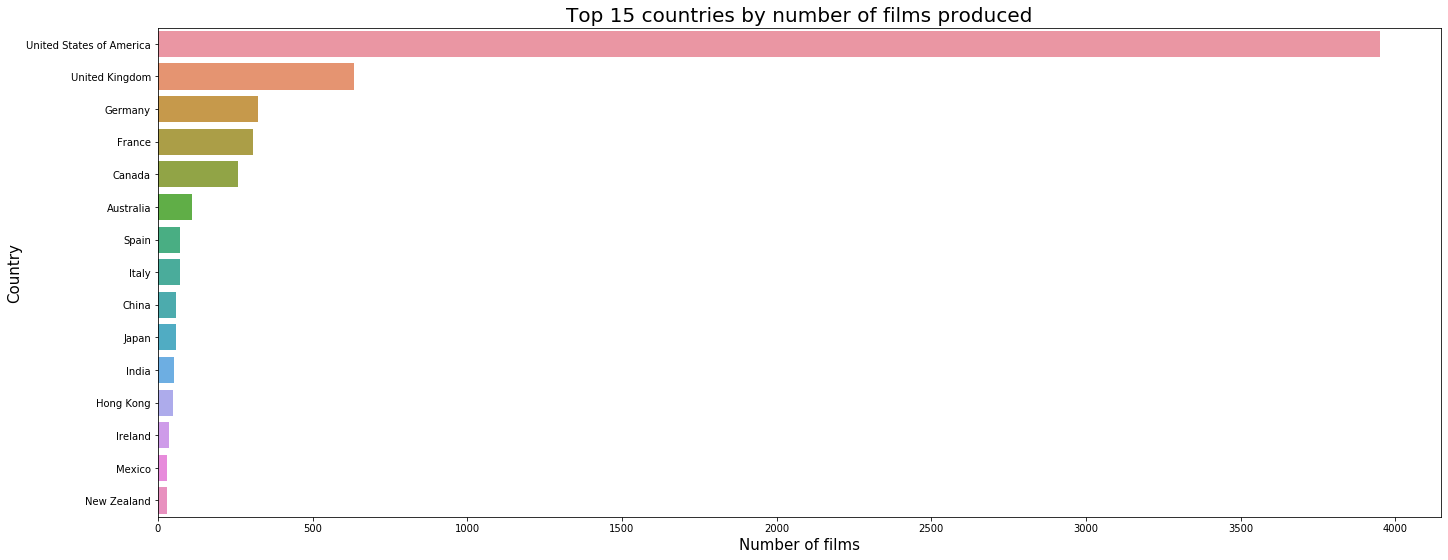

In [21]:
coutry_count = country1['country'].value_counts().sort_index()
ctc = pd.DataFrame({'country': coutry_count.index, 'count': coutry_count.values})
f, ax = plt.subplots(figsize=(23, 9))
ctc.sort_values(by=['count'], inplace=True, ascending = False)
sns.barplot(x = 'count', y = 'country', data=ctc.head(15))
ax.set_title('Top 15 countries by number of films produced', fontsize= 20)
ax.set_xlabel('Number of films', fontsize = 15)
ax.set_ylabel('Country', fontsize = 15)
plt.show()

In [22]:
country2 = country1.groupby(['country'])['revenue'].agg('sum').reset_index()

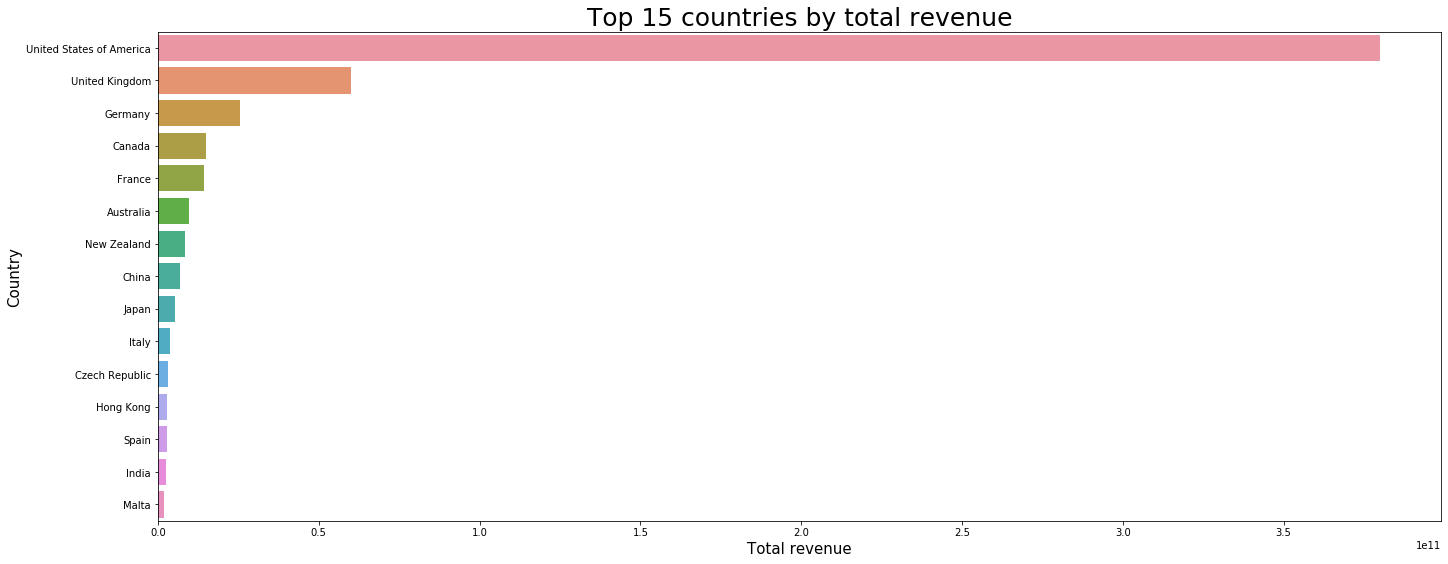

In [23]:
f, ax = plt.subplots(figsize=(23, 9))
country2.sort_values(by=['revenue'], inplace=True, ascending = False)
sns.barplot(x = 'revenue', y = 'country', data=country2.head(15))
ax.set_title('Top 15 countries by total revenue', fontsize= 25)
ax.set_xlabel('Total revenue', fontsize = 15)
ax.set_ylabel('Country', fontsize = 15)
plt.show()

#### US and European countries seem to dominate the film industry of the world for both number of films produced and total revenue generated.

### 1. Check if there's difference in revenue generated by each film between the US and the rest of the world.

H0: There is no significant difference in film revenue between the US and the other countries

In [24]:
fvalue, pvalue = stats.f_oneway(country1[country1['country'] == 'United States of America']['revenue'],
                                country1[country1['country'] != 'United States of America']['revenue'])

print(f"Results of ANOVA test:\n The F-statistic is: {fvalue}\n The p-value is: {pvalue}")

Results of ANOVA test:
 The F-statistic is: 30.530697717782953
 The p-value is: 3.4152618829560225e-08


Since p-value < 0.05 and F-statistics > 0, we can reject H0 with 95% confidence, and expect the film produced by the US studios tends to have higher revenue than their counterparts from other countries.

## 2. Analysis on Genres

### 2.1. Impact of genres on Revenue

In [25]:
genre1 = df1[['title','genre','revenue','vote_average']]

In [26]:
genre1 = genre1.drop_duplicates(subset=['title','genre','revenue','vote_average'])

In [53]:
genre1['genre'].value_counts().shape

(20,)

There are 20 different film genres in total.

In [27]:
genre1.head()

,title,genre,revenue,vote_average
0,Avatar,Action,2787965087,7.2
2,Avatar,Adventure,2787965087,7.2
4,Avatar,Fantasy,2787965087,7.2
6,Avatar,Science Fiction,2787965087,7.2
8,Pirates of the Caribbean: At World's End,Adventure,961000000,6.9


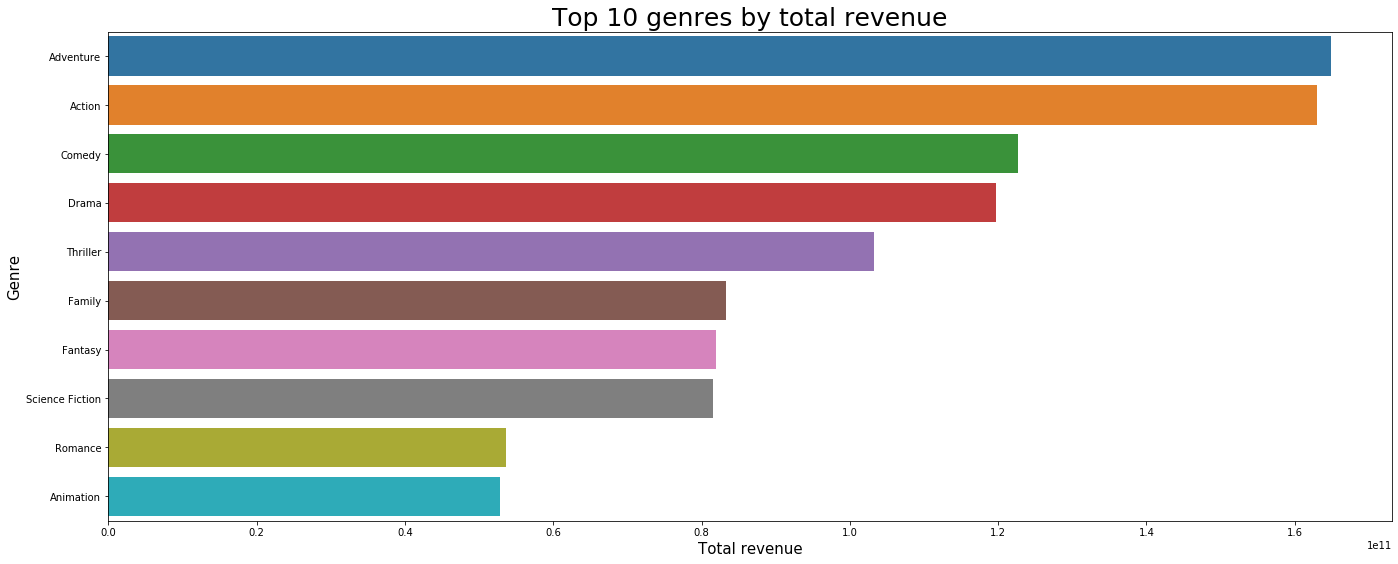

In [28]:
genre2 = genre1.groupby(['genre'])['revenue'].agg('sum').reset_index()
f, ax = plt.subplots(figsize=(23, 9))
genre2.sort_values(by=['revenue'], inplace=True, ascending = False)
sns.barplot(x = 'revenue', y = 'genre', data=genre2.head(10))
ax.set_title('Top 10 genres by total revenue', fontsize= 25)
ax.set_xlabel('Total revenue', fontsize = 15)
ax.set_ylabel('Genre', fontsize = 15)
plt.show()

### Hypothesis testing
- Pop1: films have ***'Advanture'*** in their genres
- Pop2: films have ***'Action'*** in their genres
- Pop3: films have ***'Comedy'*** in their genres
- Pop4: films have ***'Drama'*** in their genres
- Pop5: Films that don't have any genres mentioned above

***Hypothesis testing***: To test if there are differences in revenue generated amongst genres.

- H0: There is no significant difference in film revenue amongst genres
- H1: There is atleast one genre that affect significantly the revenue generated by the film

In [29]:
fvalue, pvalue = stats.f_oneway(genre1[genre1['genre'] == 'Adventure']['revenue'],
                                genre1[genre1['genre'] == 'Action']['revenue'],
                               genre1[genre1['genre'] == 'Comedy']['revenue'],
                               genre1[genre1['genre'] == 'Drama']['revenue'],
                               genre1[~genre1['genre'].isin(['Advanture','Action','Comedy','Drama'])]['revenue'])

print(f"Results of ANOVA test:\n The F-statistic is: {fvalue}\n The p-value is: {pvalue}")

Results of ANOVA test:
 The F-statistic is: 128.22293904261454
 The p-value is: 1.6661810192607416e-107


***Conclusion***: Since p-value < 0.05, we can reject H0 with 95% confidence, and expect there will be significant differences in revenue generated by each film amongs the genres that film has.

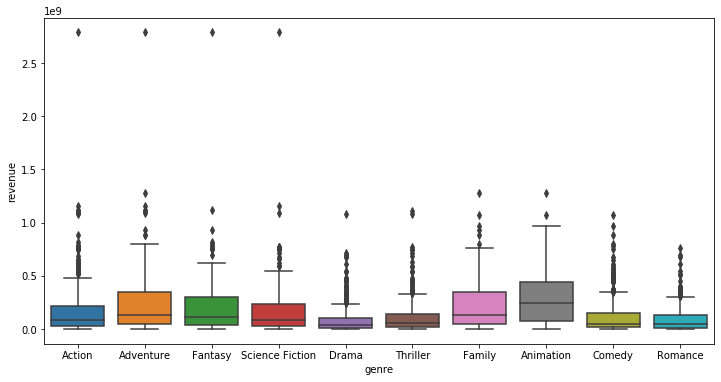

In [49]:
genre3 = genre1[genre1['genre'].isin(genre2['genre'].head(10)) & genre1['revenue'] > 0]
plt.figure(figsize = (12,6))
ax = sns.boxplot(x="genre", y="revenue", data=genre3)

### 2.2. Impact of genres on film's voting score

### Hypothesis testing
- Pop1: films have ***'Advanture'*** in their genres
- Pop2: films have ***'Action'*** in their genres
- Pop3: films have ***'Comedy'*** in their genres
- Pop4: films have ***'Drama'*** in their genres
- Pop5: Films that don't have any genres mentioned above

***Hypothesis testing***: To test if there are differences in vote score generated amongst genres.

- H0: There is no significant difference in film's vote score amongst genres
- H1: There is atleast one genre that affect significantly the vote scores the film received

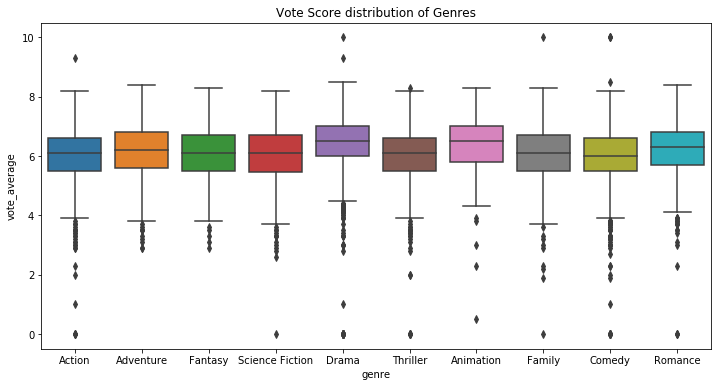

In [31]:
genre3 = genre1[genre1['genre'].isin(genre2['genre'].head(10))]
plt.figure(figsize = (12,6))
plt.title('Vote Score distribution of Genres')
ax = sns.boxplot(x="genre", y="vote_average", data=genre3)

In [32]:
fvalue, pvalue = stats.f_oneway(genre1[genre1['genre'] == 'Adventure']['vote_average'],
                                genre1[genre1['genre'] == 'Action']['vote_average'],
                               genre1[genre1['genre'] == 'Comedy']['vote_average'],
                               genre1[genre1['genre'] == 'Drama']['vote_average'],
                               genre1[~genre1['genre'].isin(['Advanture','Action','Comedy','Drama'])]['vote_average'])

print(f"Results of ANOVA test:\n The F-statistic is: {fvalue}\n The p-value is: {pvalue}")

Results of ANOVA test:
 The F-statistic is: 59.8654718870555
 The p-value is: 3.646600268341143e-50


***Conclusion***: Since p-value < 0.05, we can reject H0 with 95% confidence, and expect there will be significant differences in film's vote score regarding the genres of the film.

### 3. Impact of released dates on film's revenue

In [33]:
date1 = df1[['title','genre','revenue','release_date']]

In [34]:
date1.shape

(16726, 4)

In [35]:
date1 = date1.drop_duplicates(subset=['title','genre','revenue','release_date'])

In [36]:
date1.shape

(11857, 4)

In [37]:
date1['release_date'] = pd.to_datetime(date1['release_date'], format='%Y-%m-%d')

In [38]:
date1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11857 entries, 0 to 16725
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         11857 non-null  object        
 1   genre         11857 non-null  object        
 2   revenue       11857 non-null  int64         
 3   release_date  11857 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 463.2+ KB


In [39]:
date1['is_weekend'] = date1['release_date'].apply(lambda x: 1 if x.weekday() >4 else 0)

In [40]:
date1.head()

,title,genre,revenue,release_date,is_weekend
0,Avatar,Action,2787965087,2009-12-10,0
2,Avatar,Adventure,2787965087,2009-12-10,0
4,Avatar,Fantasy,2787965087,2009-12-10,0
6,Avatar,Science Fiction,2787965087,2009-12-10,0
8,Pirates of the Caribbean: At World's End,Adventure,961000000,2007-05-19,1


In [41]:
date1['day_name'] = date1['release_date'].dt.day_name()

In [42]:
date1['last_7_days_month'] = date1['release_date'].apply(lambda x: 1 if x.day > 22 else 0)

In [43]:
date1.head(10)

,title,genre,revenue,release_date,is_weekend,day_name,last_7_days_month
0,Avatar,Action,2787965087,2009-12-10,0,Thursday,0
2,Avatar,Adventure,2787965087,2009-12-10,0,Thursday,0
4,Avatar,Fantasy,2787965087,2009-12-10,0,Thursday,0
6,Avatar,Science Fiction,2787965087,2009-12-10,0,Thursday,0
8,Pirates of the Caribbean: At World's End,Adventure,961000000,2007-05-19,1,Saturday,0
9,Pirates of the Caribbean: At World's End,Fantasy,961000000,2007-05-19,1,Saturday,0
10,Pirates of the Caribbean: At World's End,Action,961000000,2007-05-19,1,Saturday,0
11,Spectre,Action,880674609,2015-10-26,0,Monday,1
13,Spectre,Adventure,880674609,2015-10-26,0,Monday,1
15,Spectre,Crime,880674609,2015-10-26,0,Monday,1


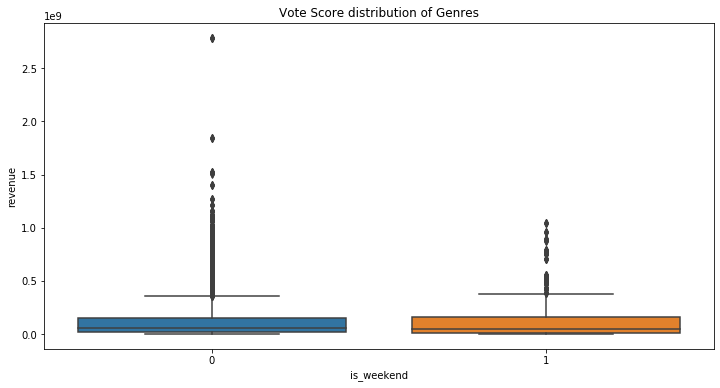

In [54]:
plt.figure(figsize = (12,6))
plt.title('Vote Score distribution of Genres')
ax = sns.boxplot(x="is_weekend", y="revenue", data=date1[date1['revenue'] > 0])

### Hypothesis testing: Released date on Revenue
1. Weekends and Weekdays
    - Pop1: films released on the weekends
    - Pop2: films released on the weekdays

***Hypothesis testing***: To test if there are differences in film's revenue generated between two populations.

    - H0: There is no significant difference in film's revenue whether it's released on weekend or weekdays
    - H1: There is a significant difference in film's revenue whether it's released on weekend or weekdays

In [45]:
fvalue, pvalue = stats.f_oneway(date1[date1['is_weekend'] == 1]['revenue'],
                                date1[date1['is_weekend'] == 0]['revenue'])

print(f"Results of ANOVA test:\n The F-statistic is: {fvalue}\n The p-value is: {pvalue}")

Results of ANOVA test:
 The F-statistic is: 12.38276269492839
 The p-value is: 0.0004349394738709805


***Conclusion:*** Since ***p-value < 0.05*** and ***F-statistics > 0***, we can reject H0 with a 95% confidence, and expect the film released on weekends tend to generate more revenue than films released on weekdays

### Hypothesis testing: Released date on Revenue
2. End of month and other days
    - Pop1: films released on the last 7 days of month
    - Pop2: films released on other days of the month

***Hypothesis testing***: To test if there are differences in film's revenue generated between two populations.

    - H0: There is no significant difference in film's revenue whether it's released on end of month or not.
    - H1: There is a significant difference in film's revenue regarding the released day.

In [46]:
fvalue, pvalue = stats.f_oneway(date1[date1['last_7_days_month'] == 1]['revenue'],
                                date1[date1['last_7_days_month'] == 0]['revenue'])

print(f"Results of ANOVA test:\n The F-statistic is: {fvalue}\n The p-value is: {pvalue}")

Results of ANOVA test:
 The F-statistic is: 14.646616703832752
 The p-value is: 0.00013033332671895324


***Conclusion:*** Since ***p-value < 0.05*** and ***F-statistics > 0***, we can reject H0 with a 95% confidence, and expect the film released on the last 7 days of a month tend to generate more revenue compared to other early released films

### Hypothesis testing: Released date on Revenue
3. End of month and other days
    - Pop1: films released on Monday
    - Pop2: films released on Tuesday
    - Pop3: films released on Wednesday
    - Pop4: films released on Thursday
    - Pop5: films released on Friday
    - Pop6: films released on Saturday
    - Pop7: films released on Sunday

***Hypothesis testing***: To test if there are differences in film's revenue generated among seven populations.

    - H0: There is no significant difference in film's revenue whether it's regardless of the released day of the week.
    - H1: Not all day of week generate the same mean revenue among populations

In [47]:
fvalue, pvalue = stats.f_oneway(date1[date1['day_name'] == 'Monday']['revenue'],
                                date1[date1['day_name'] == 'Tuesday']['revenue'],
                                date1[date1['day_name'] == 'Wednesday']['revenue'],
                                date1[date1['day_name'] == 'Thursday']['revenue'],
                                date1[date1['day_name'] == 'Friday']['revenue'],
                                date1[date1['day_name'] == 'Saturday']['revenue'],
                                date1[date1['day_name'] == 'Sunday']['revenue'])

print(f"Results of ANOVA test:\n The F-statistic is: {fvalue}\n The p-value is: {pvalue}")

Results of ANOVA test:
 The F-statistic is: 88.39443297802669
 The p-value is: 7.026453887953136e-109


***Conclusion:*** Since ***p-value < 0.05***, we can reject H0 with a 95% confidence, and expect there will be significant differences among films regarding their released day of week.

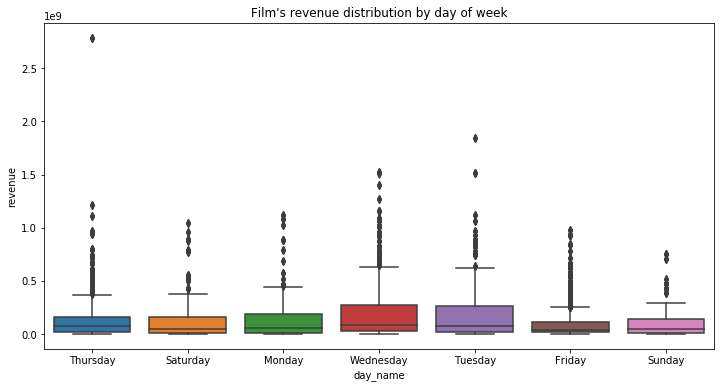

In [55]:
plt.figure(figsize = (12,6))
plt.title('Film\'s revenue distribution by day of week')
ax = sns.boxplot(x="day_name", y="revenue", data=date1[date1['revenue'] > 0])